In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from eda import utils

In [165]:
tracks = utils.load('../data/fma_metadata/tracks.csv')
features = utils.load('../data/fma_metadata/features.csv')

In [166]:
from sklearn.preprocessing import StandardScaler
small = tracks['set', 'subset'] <= 'small'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[small & train, ('track', 'genre_top')]
y_test = tracks.loc[small & test, ('track', 'genre_top')]
X_train = features.loc[small & train]
X_test = features.loc[small & test]

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
X_train.shape


c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\groot\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(6400, 518)

In [170]:
pca = PCA(0.90)
pca.fit(X_train)
print("Explained Variance", pca.explained_variance_ratio_[:10])
print("Singular Values", pca.singular_values_[:10])

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train.shape

Explained Variance [0.11557866 0.07352983 0.04589962 0.03144319 0.02854024 0.02734792
 0.02555309 0.02473222 0.02333372 0.02009182]
Singular Values [619.00434518 493.72673382 390.08514625 322.86294123 307.59810184
 301.10432662 291.05600424 286.34288005 278.12936199 258.08606109]


(6400, 143)

In [171]:
y_test.unique()

['Rock', 'International', 'Folk', 'Experimental', 'Instrumental', 'Pop', 'Hip-Hop', 'Electronic']
Categories (8, object): ['Rock', 'International', 'Folk', 'Experimental', 'Instrumental', 'Pop', 'Hip-Hop', 'Electronic']

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [10, 100, 200, 300, 500, 1000],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5,
                         return_train_score=False,
                         n_iter=6)
knn.fit(X_train, y_train)

knn.best_params_


{'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'auto'}

In [173]:
pd.DataFrame(knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.192192,0.005140,6.360295,0.049598,uniform,1000,kd_tree,"{'weights': 'uniform', 'n_neighbors': 1000, 'a...",0.342187,0.343750,0.363281,0.337500,0.341406,0.345625,0.009065,5
1,0.022651,0.005833,0.747858,0.012475,distance,500,brute,"{'weights': 'distance', 'n_neighbors': 500, 'a...",0.353906,0.368750,0.396875,0.365625,0.354687,0.367969,0.015594,4
2,0.020953,0.003966,0.397203,0.009350,distance,10,auto,"{'weights': 'distance', 'n_neighbors': 10, 'al...",0.386719,0.409375,0.457031,0.421094,0.384375,0.411719,0.026530,1
3,0.139043,0.002804,5.016752,0.044365,uniform,1000,ball_tree,"{'weights': 'uniform', 'n_neighbors': 1000, 'a...",0.342187,0.343750,0.363281,0.337500,0.341406,0.345625,0.009065,5
4,0.137696,0.002663,3.899871,0.057072,uniform,10,ball_tree,"{'weights': 'uniform', 'n_neighbors': 10, 'alg...",0.395313,0.399219,0.457031,0.413281,0.378125,0.408594,0.026686,2
5,0.192614,0.015724,5.347957,0.067648,distance,100,kd_tree,"{'weights': 'distance', 'n_neighbors': 100, 'a...",0.383594,0.412500,0.435937,0.422656,0.388281,0.408594,0.019991,2


In [176]:
neigh = KNeighborsClassifier(n_neighbors=10, weights="distance")
y_pred = neigh.fit(X_train, y_train).predict(X_test)

               precision    recall  f1-score   support

   Electronic       0.49      0.29      0.36       100
 Experimental       0.47      0.15      0.23       100
         Folk       0.21      0.26      0.23       100
      Hip-Hop       0.43      0.62      0.51       100
 Instrumental       0.34      0.21      0.26       100
International       0.23      0.41      0.30       100
          Pop       0.15      0.15      0.15       100
         Rock       0.51      0.52      0.51       100

     accuracy                           0.33       800
    macro avg       0.35      0.33      0.32       800
 weighted avg       0.35      0.33      0.32       800



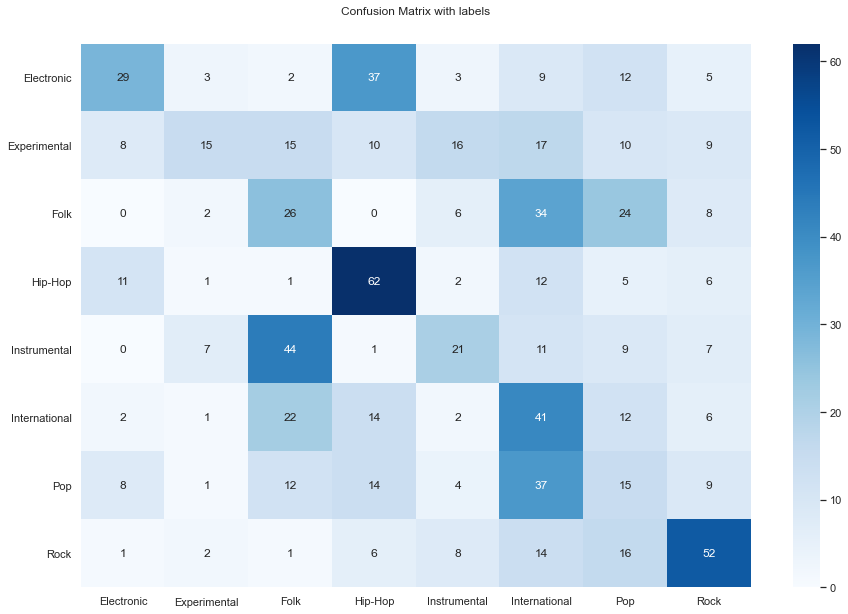

In [178]:
print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(neigh.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(neigh.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

plt.show()